In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [2]:
from PIL import Image
import glob
import os

# 가위바위보 이미지 28X28 사이즈로 reshape

In [327]:
def resize_image(img_path):
    images = glob.glob(img_path + '/*.jpg')
    print(len(images), ' images to be resized.')
    
    # 파일 모두 사이즈 변경
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, 'JPEG')
        
    print(len(images), ' images resized.')

In [328]:
image_dir_path = os.getenv('HOME') + '/aiffel/DL/data/rock_scissor_paper/scissor2'
resize_image(image_dir_path)

image_dir_path = os.getenv('HOME') + '/aiffel/DL/data/rock_scissor_paper/rock2'
resize_image(image_dir_path)

image_dir_path = os.getenv('HOME') + '/aiffel/DL/data/rock_scissor_paper/paper2'
resize_image(image_dir_path)

202  images to be resized.
202  images resized.
202  images to be resized.
202  images resized.
202  images to be resized.
202  images resized.


# 데이터 불러오기 / 정규화

In [329]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/DL/data/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path, 606)
x_train = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 606 입니다.
x_train shape: (606, 28, 28, 3)
y_train shape: (606,)


라벨:  0


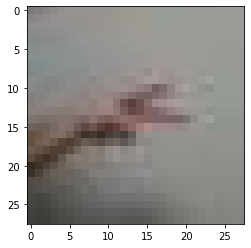

In [330]:
# 데이터 확인
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [331]:
# 모델 설계
from tensorflow import keras

n_channel_1 = 16
n_channel_2 = 32
n_dense = 32
n_train_epoch = 8

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_65 (Dense)             (None, 3)               

# 훈련데이터에서 검증데이터 분리

In [332]:
x_tr = np.concatenate((x_train[:150], x_train[202:352], x_train[404:554]))
y_tr = np.concatenate((y_train[:150], y_train[202:352],  y_train[404:554]))
x_val = np.concatenate((x_train[150:202], x_train[352:404], x_train[554:606]))
y_val = np.concatenate((y_train[150:202], y_train[352:404],  y_train[554:606]))

In [333]:
model.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics = ['accuracy'])
hist = model.fit(x_train, y_train, epochs=n_train_epoch, validation_data=(x_val, y_val))

Epoch 1/8
19/19 [==============================] - 1s 37ms/step - loss: 1.1042 - accuracy: 0.3168 - val_loss: 1.0954 - val_accuracy: 0.3333
Epoch 2/8
19/19 [==============================] - 0s 22ms/step - loss: 1.0882 - accuracy: 0.3647 - val_loss: 1.0699 - val_accuracy: 0.3397
Epoch 3/8
19/19 [==============================] - 0s 23ms/step - loss: 1.0429 - accuracy: 0.5231 - val_loss: 0.9980 - val_accuracy: 0.6090
Epoch 4/8
19/19 [==============================] - 0s 26ms/step - loss: 0.9375 - accuracy: 0.5941 - val_loss: 0.8445 - val_accuracy: 0.6667
Epoch 5/8
19/19 [==============================] - 0s 23ms/step - loss: 0.7406 - accuracy: 0.8003 - val_loss: 0.5975 - val_accuracy: 0.8077
Epoch 6/8
19/19 [==============================] - 0s 25ms/step - loss: 0.5172 - accuracy: 0.8993 - val_loss: 0.3712 - val_accuracy: 0.9295
Epoch 7/8
19/19 [==============================] - 0s 25ms/step - loss: 0.3415 - accuracy: 0.9323 - val_loss: 0.2680 - val_accuracy: 0.9423
Epoch 8/8
19/19 [===

In [334]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [335]:
# test 데이터 불러오기
image_dir_path = os.getenv("HOME") + "/aiffel/DL/data/rock_scissor_paper/scissor"
resize_image(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/DL/data/rock_scissor_paper/rock"
resize_image(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/DL/data/rock_scissor_paper/paper"
resize_image(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/DL/data/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
테스트 데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [336]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 5.0542 - accuracy: 0.9400
test_loss: 5.054183006286621 
test_accuracy: 0.9399999976158142


In [337]:
hist = hist.history
loss = hist['loss']
val_loss = hist['val_loss']
accuracy = hist['accuracy']
val_accuracy = hist['val_accuracy']
epochs = range(1, len(loss) + 1)

### 힉습 결과 시각화(train acc / train loss / val acc / val loss)

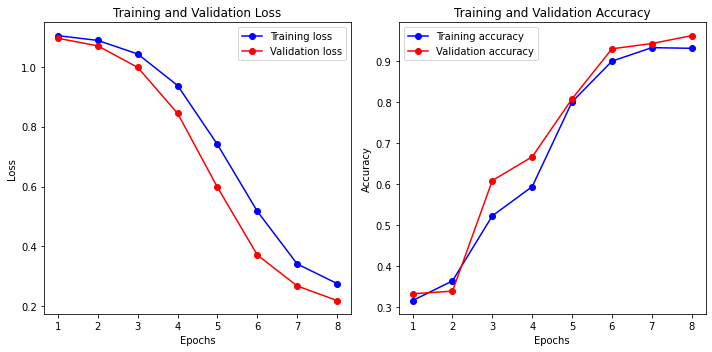

In [338]:
plt.figure(figsize=(10, 5))

# loss
plt.subplot(1, 2, 1) 
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 성능 향상 시도

## 1. 데이터 수 늘리기 (100 => 202)

## 2. 파라미터 조정

n_channel_1 = 16  
n_channel_2 = 32  
n_dense = 16  
n_train_epoch = 10  
=>  
10/10 - 0s - loss: 72.4413 - accuracy: 0.3333  
test_loss: 72.44127655029297   
test_accuracy: 0.3333333432674408  

 n_channel_1 = 16  
n_channel_2 = 32  
n_dense = 32  
n_train_epoch = 10    
=>  
10/10 - 0s - loss: 81.0810 - accuracy: 0.6900  
test_loss: 81.08096313476562   
test_accuracy: 0.6899999976158142  

n_channel_1 = 16  
n_channel_2 = 32  
n_dense = 32  
n_train_epoch = 8  
=>  
10/10 - 0s - loss: 5.0542 - accuracy: 0.9400  
test_loss: 5.054183006286621   
test_accuracy: 0.9399999976158142  

## 3. 정규화

- 정규화 미실시  
10/10 - 0s - loss: 5.9860 - accuracy: 0.5133  
test_loss: 5.986032009124756   
test_accuracy: 0.5133333206176758  

- 정규화 실시  
10/10 - 0s - loss: 33.8727 - accuracy: 0.7133  
test_loss: 33.87269592285156   
test_accuracy: 0.7133333086967468  